# Summary
In the previous experiment we tried multiple things but eventualy none of the networds were able to discriminate adequetly between classes. In a previous attempt we used Incemption model with 760K params and it got the best results so far. In this notebook we try to increase the model size. 
We also add some callbacks.

In [8]:
import pandas as pd
_ = pd.read_csv('./data/combined_data/metadata_balanced_by_death.csv', index_col=0)
_ [_['sample'] == 'train']

,sample,reading,dates,one_year_until_death,CVA,first_AF_in_home_ECG,first_AF_in_Dispatch,AF,IHD,sp_MI_all,sp_CABG,CHF,sp_CPR,cpr_shl,DM2,AF2,DM
0,train,427094,01/09/2008,1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,train,449383,25/05/2018,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,train,511490,19/08/2018,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,train,419384,04/05/2014,1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,train,451966,17/07/2005,1,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629979,train,336872,27/02/2011,1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
629980,train,281503,16/01/2015,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
629981,train,275021,10/02/2012,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
629982,train,37783,24/03/2016,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
config = {
    # general
    'seed': 123,
    'metadata_file_path': './data/combined_data/metadata_balanced_by_death.csv',
    'data_folder_path': './data/individual-signals/',
    'fillna': 0,
    # training
    'batch_size': 32,
    'n_epochs': 30,
    # architecture
    'targets': ['one_year_until_death'],
    'input_dimension': 12,
    'hidden_dimmension':  64 ,          # d_model (int) – the number of expected features in the input (required)???
    'attention_heads': 4 ,            # number of attention heads, if None then d_model//64
    'encoder_number_of_layers': 8,
    'dropout': 0.4,
    'clip': 1,
    'positional_encodings': False,
    'saving_path': './models/exp1',
}



training using device: mps




/opt/homebrew/Caskroom/miniforge/base/envs/torch-gpu/lib/python3.8/site-packages/torch/nn/modules/transformer.py:218: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because  self.layers[0].self_attn.batch_first was not True
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


64 4
The model has 683,016 trainable parameters
TransformerEncoderDownstream(
  (project_input): Linear(in_features=12, out_features=64, bias=True)
  (encoder): Linear(in_features=12, out_features=64, bias=True)
  (pos_encoder): PositionalEncoding(
    (dropout): Dropout(p=0.4, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-7): 8 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_features=512, bias=True)
        (dropout): Dropout(p=0.4, inplace=False)
        (linear2): Linear(in_features=512, out_features=64, bias=True)
        (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.4, inplace=False)
        (dropout2): Dropout(p=0.4, inplace=False)
      )
 

Within epoch loss (validation) 0.68617: 100%|██████████| 1680/1680 [07:35<00:00,  3.69it/s]

First 5 examples:
[0. 0. 0. 0. 0.] [0.49634621 0.49634621 0.49634621 0.49634621 0.49634621]
Lengths 53760 53760


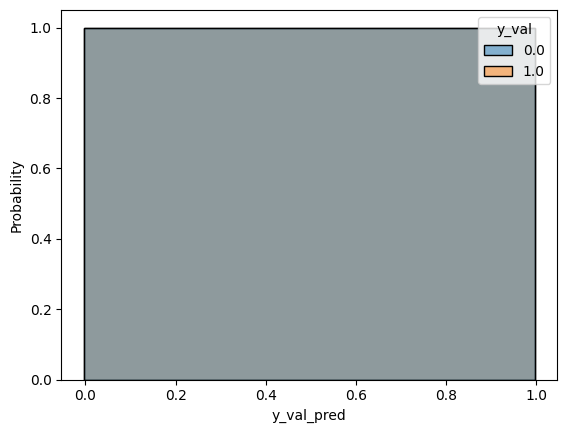

---------------------------------------------
Epoch: 01 | Time: 268m 31s
	Train Loss: 0.693
	 Val. Loss: 0.686
	 Best Val. Loss: 0.686
---------------------------------------------


Within epoch loss (training) 0.69318:  21%|██        | 3435/16198 [52:36<3:15:28,  1.09it/s]


KeyboardInterrupt: 

In [10]:
import os
# make sure we're in the correct directory
os.chdir('/Users/davidharar/Documents/School/thesis/downstream_classification')
from executors.train_on_local_machine_mps import trainer
trainer(**config)
